# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.
The project is Tata steel machine failure classification.Machine failure in industry is the biggest hurdle.Machine's maintainance takes a lot of work which needs lots of human intervention.The data science classsifier model helps to make this procedure easier and automations reduces human intervenvention and saves efforts.Following model is trained based on various features making it efficient to classify the machine's failure like process temperature,torque,rotational speed , tool wear,heat dissiption failure etc which is further explained statistically and in more detailed form.
In the context of **machine failure**, these variables represent different operating conditions and failure indicators for industrial machinery. Here’s what each variable means:

### **Input Variables:**
1. **ID** – A unique identifier for each data entry (record).
2. **Product ID** – A unique identifier for the product being manufactured in a given cycle.
3. **Type** – The type or category of the machine tool.
4. **Air temperature [K]** – The surrounding air temperature in Kelvin, which can impact machine performance.
5. **Process temperature [K]** – The temperature at which the machining process operates, measured in Kelvin. Higher process temperatures can lead to thermal expansion and stress on components.
6. **Rotational speed [rpm]** – The speed of the machine’s rotating parts in **revolutions per minute (RPM)**. Changes in speed can indicate machine wear or improper functioning.
7. **Torque [Nm]** – The rotational force applied to the machine, measured in **Newton-meters (Nm)**. Excessive or fluctuating torque can suggest mechanical issues.
8. **Tool wear [min]** – The amount of wear on the tool in **minutes**. Over time, tool wear can lead to poor performance or machine breakdown.

### **Output Variables (Failure Indicators):**
9. **Machine failure** – A binary variable (0 or 1) indicating whether the machine has failed (1) or is still operational (0).

### **Failure Types:**
These indicate specific reasons for machine failure:
- **TWF (Tool Wear Failure)** – The machine failed due to excessive tool wear.
- **HDF (Heat Dissipation Failure)** – Failure caused by overheating, which could be due to improper cooling or excessive friction.
- **PWF (Power Failure)** – A failure related to electrical power issues, such as voltage fluctuations or sudden shutdowns.
- **OSF (Overstrain Failure)** – The machine failed due to excessive mechanical load or stress beyond its operational limits.
- **RNF (Random Failure)** – A failure that occurs due to an unexpected or random reason, not classified under the above categories.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Machine failure classification**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn

### Dataset Loading

In [ ]:
# Load Dataset
dataset=pd.read_csv("https://drive.google.com/uc?export=download&id=1FtVplevoesHwZxpzLE_bJQEV1fYviit4")

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head(10)

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
5,5,M24300,M,298.4,308.9,1429,42.1,65,0,0,0,0,0,0
6,6,L56736,L,299.6,311.0,1413,42.9,156,0,0,0,0,0,0
7,7,L55488,L,298.7,310.1,1609,38.1,67,0,0,0,0,0,0
8,8,L56397,L,297.7,308.8,1578,35.2,13,0,0,0,0,0,0
9,9,L55067,L,300.5,312.3,1447,53.3,98,0,0,0,0,0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows,columns=dataset.shape
print(f"No of rows: {rows}")
print(f"No of columns: {columns}")

No of rows: 136429
No of columns: 14


### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_value=dataset.duplicated().sum()
print(f"duplicate value:{duplicate_value}")
#There are no duplicate values in the dataset

duplicate value:0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Null_values=dataset.isnull().sum()
print(f"Null_values:{Null_values}")
#it can be observed there are no null values

Null_values:id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


### What did you know about your dataset?

Dataset contains 136429 rows and 14 columns and the features are 'id', 'ProductID', 'Type', 'Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF','RNF'.Here 'id', 'ProductID' are used as identifiers which are not useful for further model training.Machine failure is the dependent variable while others are independent variable.The info() tell that there are no null values and duplicated() specifies that there are no duplicate values in the dataset

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variables Description

Dataset contains Machine failure,TWF	HDF,	PWF,	OSF,	RNF contains categorical values i.e 0 and 1 others contains numerical value with datatype int and float,types is categorical data containing three values L,M,S hence not described


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for cols in dataset.columns:
  unique_values=dataset[cols].unique()
  unique_value_sum=dataset[cols].nunique()
  print(f"{cols}:")
  print(f"Total unique values:{unique_value_sum}")
  print(f"{unique_values}")

id:
Total unique values:136429
[     0      1      2 ... 136426 136427 136428]
Product ID:
Total unique values:9976
['L50096' 'M20343' 'L49454' ... 'M18739' 'L50940' 'L48036']
Type:
Total unique values:3
['L' 'M' 'H']
Air temperature [K]:
Total unique values:95
[300.6   302.6   299.3   301.    298.    298.4   299.6   298.7   297.7
 300.5   301.5   301.4   297.1   298.5   297.6   300.4   303.5   298.6
 300.9   297.2   298.3   297.4   301.3   300.2   300.1   297.8   300.7
 300.8   299.2   299.7   302.5   301.8   296.7   302.4   298.1   301.9
 299.1   299.    299.8   298.9   297.3   297.9   298.8   300.    302.3
 297.5   303.9   301.7   303.7   301.2   303.3   303.6   300.3   302.1
 299.5   299.4   302.2   297.    298.2   304.    303.1   296.9   301.1
 295.5   302.    304.2   303.4   296.1   302.9   301.6   304.1   303.
 295.6   302.7   296.8   296.2   303.8   299.9   295.7   303.2   296.3
 295.9   295.8   302.8   296.6   296.5   296.4   304.3   296.    295.4
 304.4   295.3   300.98  297.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#1.Removing the columns that are not necessary for data analysis
dataset.drop(['id','Product ID'],inplace=True,axis=1)


In [ ]:
#2.As the above analysis there are no duplicate or null values to handle in dataset

In [ ]:
#Checking for any column contains anymore outliers
dataset.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#After analysing the data it can be seen that:
"""
for Air temperature:
  min:295 and max:304 mean:309
  difference:
  304-295=8
  the difference is very less which shows data appears to be closer to mean there are less chance of any outliers even the data has less variance
  std:1.86
  The lower standard deviation shows the data is closely packed and low chances of outliers
for Process temperature:
  min:305 and max:313 mean:309
  difference:
  304-295=8
  the difference is very less there are less chance of any outliers even the data has less variance
  std:1.38
  The lower standard deviation shows the data is closely packed and low chances of outliers
for RPM:
  min:1181 and max:2886 mean:1520
  difference:
  2886-1181=1750
  the difference is high there showing the data is distant from mean and has  more chance of any outliers even the data has more variance
  std:138.7
  The higher standard deviation shows the data is loosely  packed and high chances of outliers
for torque:
  min:3.8 and max:76.6 mean:40.3
  difference:
  76.6-3.8=72.8
  the difference is high there showing the data is distant from mean and has  more chance of any outliers even the data has more variance
  std:138.7
  The higher standard deviation shows the data is loosely  packed and high chances of outliers
for tool wear:
  Based on iqr method:
  lowerbound calculated=-118.5
  upperbound calculated=325
  No data has such extended range hence data falls within range
for machine failure,TWF,HDF,PWF,OSF,RNF:
  the dataset contains binary values so there are no chance of outliers
"""


'\nfor Air temperature:\n  min:295 and max:304 mean:309\n  difference:\n  304-295=8\n  the difference is very less which shows data appears to be closer to mean there are less chance of any outliers even the data has less variance\n  std:1.86\n  The lower standard deviation shows the data is closely packed and low chances of outliers\nfor Process temperature:\n  min:305 and max:313 mean:309\n  difference:\n  304-295=8\n  the difference is very less there are less chance of any outliers even the data has less variance\n  std:1.38\n  The lower standard deviation shows the data is closely packed and low chances of outliers\nfor RPM:\n  min:1181 and max:2886 mean:1520\n  difference:\n  2886-1181=1750\n  the difference is high there showing the data is distant from mean and has  more chance of any outliers even the data has more variance\n  std:138.7\n  The higher standard deviation shows the data is loosely  packed and high chances of outliers\nfor torque:\n  min:3.8 and max:76.6 mean:40.3

In [ ]:
rpm_q1=dataset['Rotational speed [rpm]'].quantile(0.25)
rpm_q3=dataset['Rotational speed [rpm]'].quantile(0.75)
iqr_rpm=rpm_q3-rpm_q1
low_rpm=rpm_q1-1.5*iqr_rpm
up_rpm=rpm_q3+1.5*iqr_rpm
torque_q1=dataset['Torque [Nm]'].quantile(0.25)
torque_q3=dataset['Torque [Nm]'].quantile(0.75)
iqr_t=torque_q3-torque_q1
low_torque=torque_q1-1.5*iqr_t
up_torque=torque_q3+1.5*iqr_t
filtered_data=dataset[((dataset['Rotational speed [rpm]']>low_rpm)&(dataset['Rotational speed [rpm]']<up_rpm)&(dataset['Torque [Nm]']>low_torque)&(dataset['Torque [Nm]']<up_torque))]

In [ ]:
rows,cols=filtered_data.shape
print(f"rows:{rows} \n cols:{cols}")

rows:130667 
 cols:12


### What all manipulations have you done and insights you found?



1.   Removing irrelevent columns like id,productid
2.   Identifying which columns contain outliers i.e torque,rotational speed
3.   Checking for duplicate and null values though the data doesn't contain any such issue
2.   Conducting hotencoding on column like types which is categorical data values





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-22-28b64e761931>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.lineplot(data=filtered_data,x='x_binned',y='Tool wear [min]',ci=None)


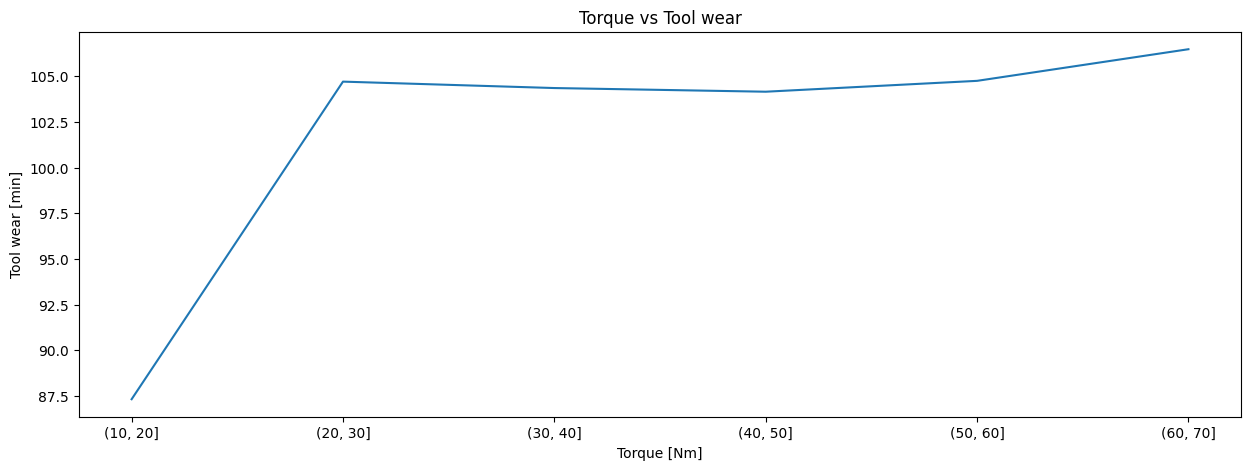

In [ ]:
# Chart - 1 visualization code
# seaborn.lineplot(data=filtered_data,y='Air temperature [K]',x='Process temperature [K]')
plt.figure(figsize=(15,5))
bins=[10,20,30,40,50,60,70,80]
labels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80']
filtered_data=filtered_data.sort_values(by='Torque [Nm]')
filtered_data['x_binned']=pd.cut(filtered_data['Torque [Nm]'],bins=bins).astype(str)
seaborn.lineplot(data=filtered_data,x='x_binned',y='Tool wear [min]',ci=None)
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')
plt.title('Torque vs Tool wear')
plt.show()

##### 1. Why did you pick the specific chart?

Line chart is best to show the trends and how one variable causes changes and how much changes on the other variable i.e relation between two variables

##### 2. What is/are the insight(s) found from the chart?

Torque has direct effect on tool wear,if torque is less the tool wear increases and if  torque is higher it generates more heat at the cutting edge (basically friction increases) and this leads the tool wear.Torque plays vital role in machine functionality but if the treshold level is exceeded it can lead to tool wearing

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For the longevity of the machines the torque needs to be maintained as torque can prove as crucial element to be focused

#### Chart - 2

<ipython-input-19-7b4da9b68fab>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.lineplot(data=filtered_data,x='rpm',y='Tool wear [min]',ci=None,ax=ax1)


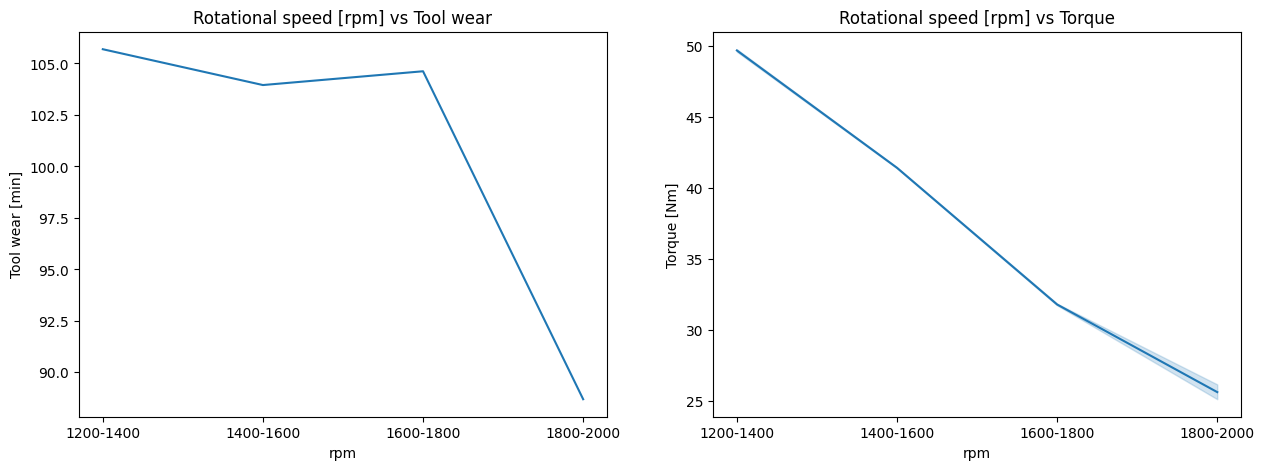

In [ ]:
# Chart - 2 visualization code
figsize,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
bins=[1000,1200,1400,1600,1800,2000,]
label=['1000-1200','1200-1400','1400-1600','1600-1800','1800-2000']
filtered_data=filtered_data.sort_values(by='Rotational speed [rpm]')
filtered_data['rpm']=pd.cut(filtered_data['Rotational speed [rpm]'],bins=bins,labels=label).astype(str)
seaborn.lineplot(data=filtered_data,x='rpm',y='Torque [Nm]',ax=ax2)
ax2.set_title('Rotational speed [rpm] vs Torque')
seaborn.lineplot(data=filtered_data,x='rpm',y='Tool wear [min]',ci=None,ax=ax1)
ax1.set_title('Rotational speed [rpm] vs Tool wear')
plt.xlabel('rpm')
plt.show()

##### 1. Why did you pick the specific chart?

Line chart is best to show the trends and how one variable causes changes and how much changes on the other variable i.e relation between two variables.

##### 2. What is/are the insight(s) found from the chart?

Torque and rotational speed are inversely related to each other hence the tool wear is also inversely related to rotational speed where tool wear leverage can lead to increase in machine failure rate

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In order to reduce the machine failure it is crucial to look after the  factors of the machines like rotational speed and torque which can affect the lifespan of machine causing tool wearing and hence leading to machine failure

#### Chart - 3

<ipython-input-21-ebe4eb4e4fb7>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.lineplot(data=filtered_data,x='Air temperature',y='Process temperature [K]',ci=None,ax=ax1)
<ipython-input-21-ebe4eb4e4fb7>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  seaborn.lineplot(data=filtered_data,x='process temperature',y='Tool wear [min]',ci=None,ax=ax2)


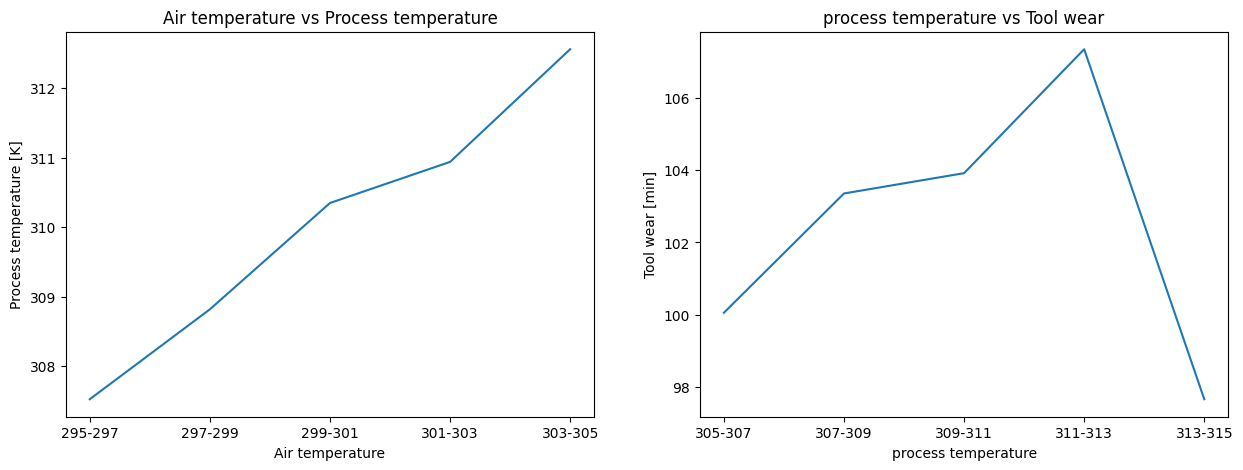

In [ ]:
# Chart - 3 visualization code
figsize,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
bins=[295,297,299,301,303,305]
label=['295-297','297-299','299-301','301-303','303-305']
filtered_data=filtered_data.sort_values(by='Air temperature [K]')
filtered_data['Air temperature']=pd.cut(filtered_data['Air temperature [K]'],bins=bins,labels=label).astype(str)
filtered_data['process temperature']=pd.cut(filtered_data['Process temperature [K]'],bins=[305,307,309,311,313,315],labels=['305-307','307-309','309-311','311-313','313-315']).astype(str)
seaborn.lineplot(data=filtered_data,x='Air temperature',y='Process temperature [K]',ci=None,ax=ax1)
ax1.set_title('Air temperature vs Process temperature')
seaborn.lineplot(data=filtered_data,x='process temperature',y='Tool wear [min]',ci=None,ax=ax2)
ax2.set_title('process temperature vs Tool wear')
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Line chart is best to show the trends and how one variable causes changes and how much changes on the other variable i.e relation between two variables. Here two graphs are plotted in the same plane.One shows the relation between air temperature and process temperature and one shows relation between tool wear and process temperature


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Air temperature is directly proportional to process temperature which affects the tool wear duration which fluctuates as seen in the graph or gradually decreases as the temperature increases that is takes less time to wear one need to observe the temperature and process temperature

#### Chart - 4

Text(0.5, 1.0, 'Rotated Area Plot of Machine Failure and Tool Wear')

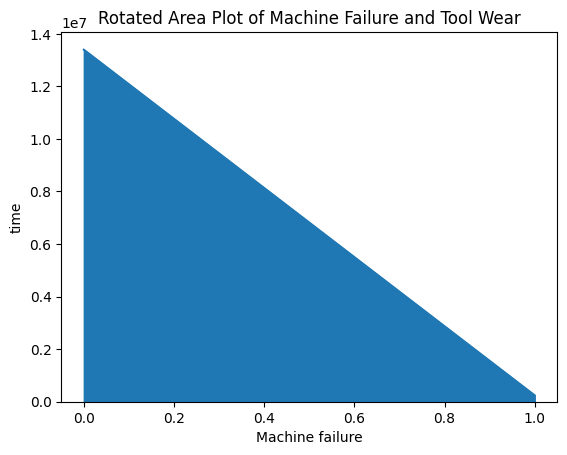

In [ ]:
# Chart - 4 visualization code
filtered_data.groupby('Machine failure')['Tool wear [min]'].sum().plot(kind='area')
plt.ylabel('total tool wear')
plt.xlabel("Machine failure")
plt.ylabel("time")
plt.title("Rotated Area Plot of Machine Failure and Tool Wear")


##### 1. Why did you pick the specific chart?

An area plot is a type of data visualization that represents quantities over time or categories using filled areas under a line. It helps show trends, distributions, and relationships between multiple variables. Typically used for cumulative data, it highlights how values change over time, making it useful for comparing different datasets, such as tool wear vs. machine failure in manufacturing.

##### 2. What is/are the insight(s) found from the chart?

As per the graph it can be observed that as the tool wear duration increases.After observing the graph it forms a right angled triangle as value on y axis increases that is time the x axis value approaches to 1 which depicts machine failure

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Even if the machines are in good condition they gradually depreciate with time leading to machine failure.For decreasing the machine failure the machines need to be either yearly inspected and not to be neglected

#### Chart - 5

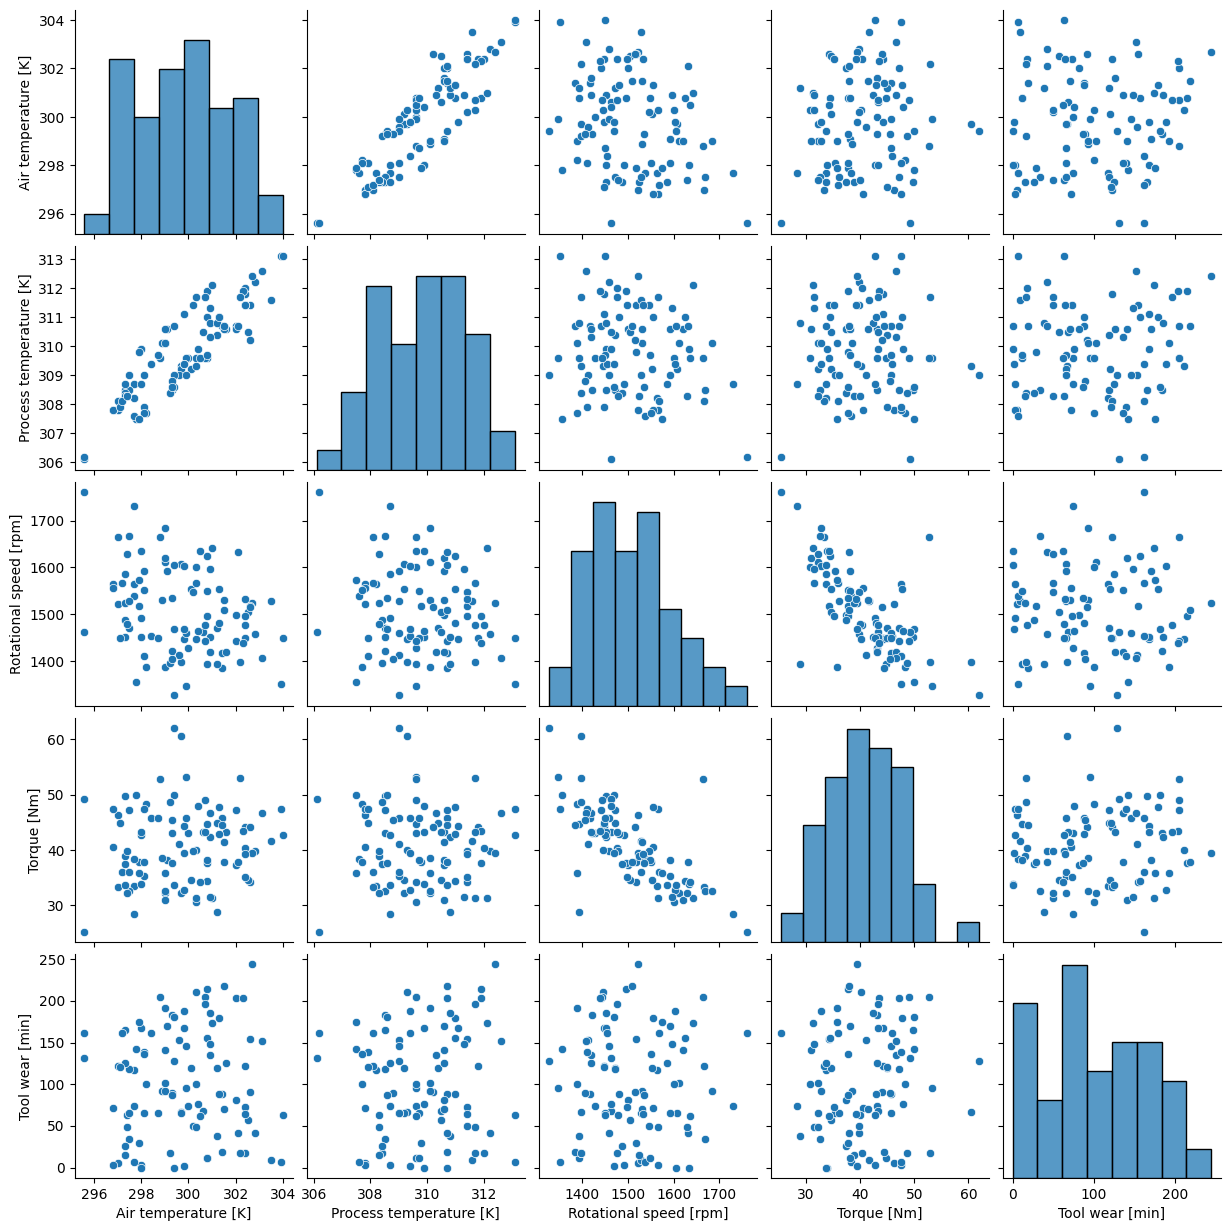

In [ ]:
# Chart - 5 visualization code
sample=filtered_data.sample(100)
seaborn.pairplot(sample[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']])


##### 1. Why did you pick the specific chart?

Pairplots show relationships between multiple variables at once, helping detect correlations, trends, or outliers among different variables.

##### 2. What is/are the insight(s) found from the chart?

Though there is no clear relationship between the variable but there is visible relation between torque,rotational speed and air temperature,process temperature

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This are the main and crucial fators to monitor though they won't show a clear graph if they decrese or increase tool wear but have great impact on it as observed in previous graphs

#### Chart - 6

<Axes: xlabel='Machine failure', ylabel='count'>

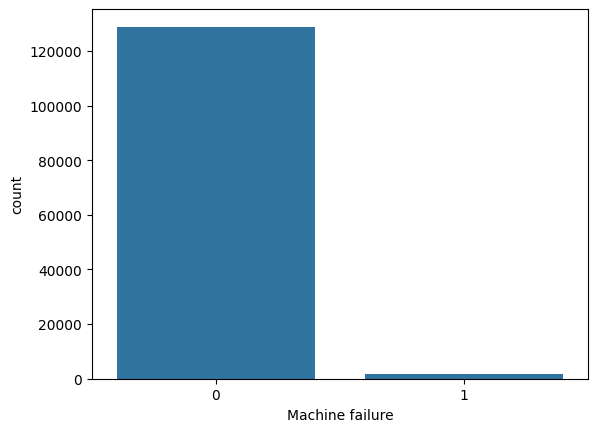

In [ ]:
# Chart - 6 visualization code
seaborn.countplot(x='Machine failure', data=filtered_data)


##### 1. Why did you pick the specific chart?

Bar plots are useful for comparing categorical data, such as comparing average tool wear across different machine types.

##### 2. What is/are the insight(s) found from the chart?

The number of machine that are failed are way less than machine that are working and are in good condition hence it can be said machines are well maintained

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Directing attention to high-wear machines can improve overall operational efficiency and reduce unplanned maintenance costs.


#### Chart - 7

<Axes: xlabel='Machine failure', ylabel='Air temperature [K]'>

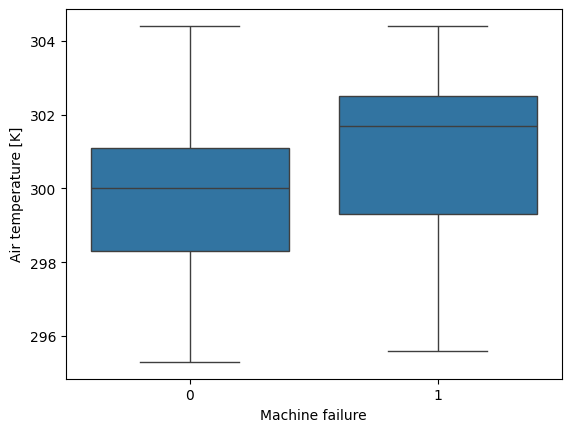

In [ ]:
# Chart - 7 visualization code
seaborn.boxplot(x='Machine failure', y='Air temperature [K]', data=filtered_data)


##### 1. Why did you pick the specific chart?

Box plots provide a summary of the data's spread and outliers, particularly useful to understand distributions between categories (e.g., failure vs no failure).


##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

<Axes: xlabel='Tool wear [min]', ylabel='Count'>

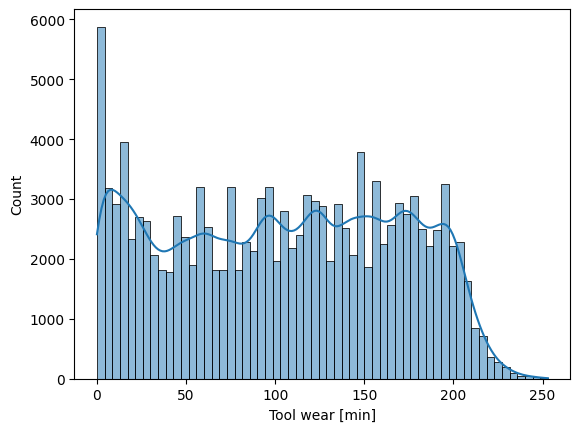

In [ ]:
# Chart - 8 visualization code
seaborn.histplot(filtered_data['Tool wear [min]'], kde=True)

##### 1. Why did you pick the specific chart?

KDE plots provide a smoothed estimate of the data's distribution, making it easier to spot areas with high concentrations of data points..

##### 2. What is/are the insight(s) found from the chart?

Helps identify the typical tool wear level in a manufacturing process.
1. If the peak is low tool wear, tools are lasting longer.
2. If the peak is high tool wear, tools may be degrading quickly.
3. A wide spread means there is high variability in tool wear.
4. A skewed distribution (toward high wear) may indicate that tools need replacement sooner.
The graph is Right-Skewed (Positively Skewed)
*   The peak is on the left, and the tail extends to the right.

*   This means most tool wear values are low, but some tools have extremely high wear.
Tools usually last long, but some degrade quickly due to defects or high stress.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The machines need to be replaced if the tool wear is high or else the machine failure is sure to occur and others need to be maintained

#### Chart - 9

<Axes: xlabel='Machine failure', ylabel='Tool wear [min]'>

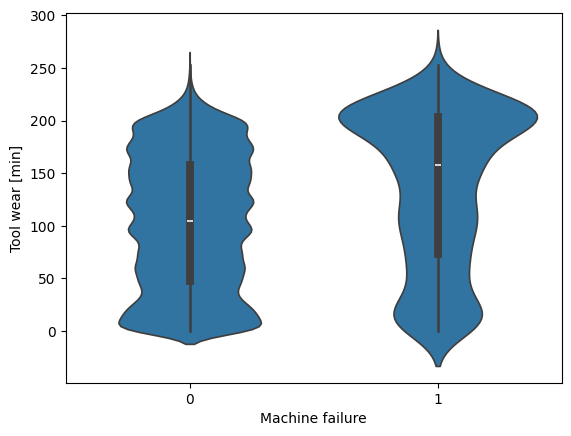

In [ ]:
# Chart - 9 visualization code
seaborn.violinplot(x='Machine failure', y='Tool wear [min]', data=filtered_data)

##### 1. Why did you pick the specific chart?

Violin plots provide a detailed distribution of a variable across different categories, showing data distribution, central tendency, and outliers.


##### 2. What is/are the insight(s) found from the chart?

Variations in tool wear between different failure categories might indicate that certain machine issues are causing excessive wear.
The density of violin toward 200 is more it can be seen that as the time imcreases the density of machnine failure increases and range is more than 0 i.e working machines

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

<Axes: >

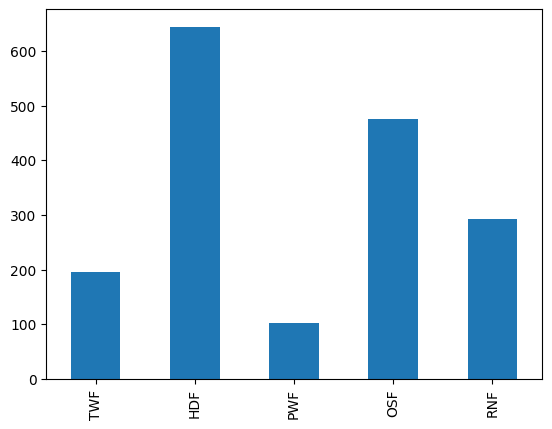

In [ ]:
# Chart - 11 visualization code
filtered_data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum().plot(kind='bar')


##### 1. Why did you pick the specific chart?

 Bar plots show not only the average value but also the variability, giving a more complete picture of the data.


##### 2. What is/are the insight(s) found from the chart?

Shows which failure has more impact on machine failure
HDF has the most effect

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 By targeting the category with higher tool wear, companies can reduce costs associated with tool replacement and machine downtime.


#### CHART 12


<Axes: >

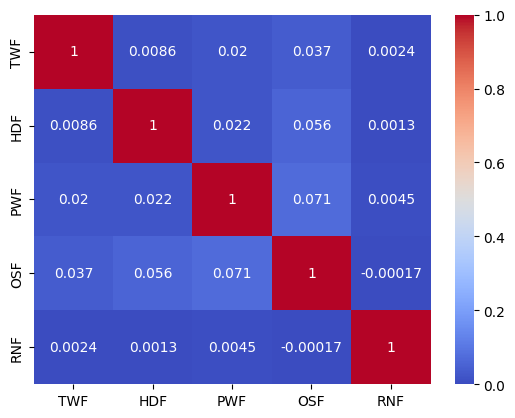

In [ ]:
seaborn.heatmap(filtered_data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].corr(), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:

filtered_data.drop(['rpm','Air temperature','process temperature'],axis=1,inplace=True)

<Figure size 1500x1500 with 0 Axes>

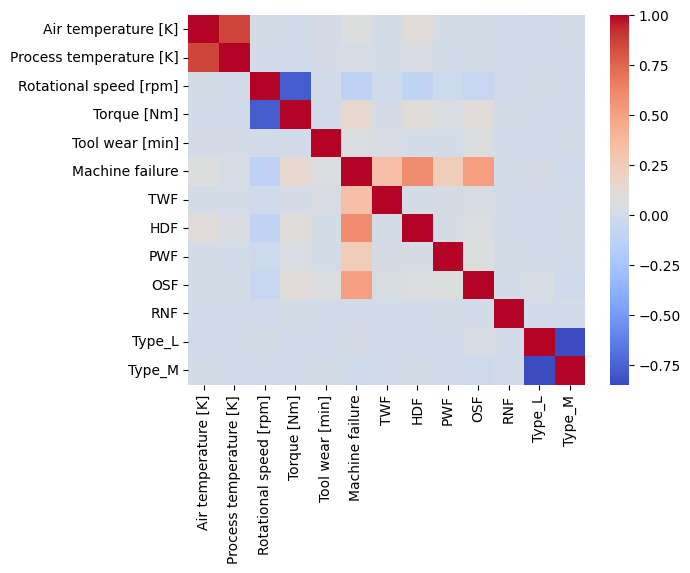

<Figure size 1500x1500 with 0 Axes>

In [ ]:
# Correlation Heatmap visualization code
corr_matrix = filtered_data.corr()
seaborn.heatmap(corr_matrix,cmap='coolwarm')
plt.figure(figsize=(15,15))

In [ ]:
corr_matrix

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
Air temperature [K],1.000000,0.855839,0.004684,-0.001092,0.017208,0.070462,0.004503,0.099425,0.005560,0.007848,0.004029,-0.002935,0.009380
Process temperature [K],0.855839,1.000000,0.003129,-0.002877,0.013492,0.033100,0.005177,0.041991,0.003644,0.006725,0.003573,0.003206,0.000304
Rotational speed [rpm],0.004684,0.003129,1.000000,-0.781234,0.004251,-0.121260,-0.010171,-0.099336,-0.024961,-0.073452,-0.006161,0.007321,-0.005950
Torque [Nm],-0.001092,-0.002877,-0.781234,1.000000,-0.003278,0.143646,0.011651,0.096601,0.049754,0.103782,0.009217,-0.004678,0.003862
Tool wear [min],0.017208,0.013492,0.004251,-0.003278,1.000000,0.058147,0.045594,0.009101,0.004613,0.062178,-0.000784,-0.007856,0.006825
Machine failure,0.070462,0.033100,-0.121260,0.143646,0.058147,1.000000,0.330192,0.595415,0.236351,0.512042,0.002878,0.012913,-0.011508
TWF,0.004503,0.005177,-0.010171,0.011651,0.045594,0.330192,1.000000,0.008603,0.020215,0.037151,0.002369,-0.003667,0.002397
HDF,0.099425,0.041991,-0.099336,0.096601,0.009101,0.595415,0.008603,1.000000,0.021510,0.055604,0.001298,-0.003510,0.004768
PWF,0.005560,0.003644,-0.024961,0.049754,0.004613,0.236351,0.020215,0.021510,1.000000,0.071084,0.004480,0.002160,-0.000642
OSF,0.007848,0.006725,-0.073452,0.103782,0.062178,0.512042,0.037151,0.055604,0.071084,1.000000,-0.000171,0.027955,-0.024251


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

A machine operating at a high process temperature (above 600K) and experiencing high torque fluctuations is more likely to suffer from Heat Dissipation Failure (HDF), leading to an increased risk of machine breakdown.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

If a machine's tool wear exceeds 250 minutes without replacement, the probability of Tool Wear Failure (TWF) significantly increases, causing unplanned downtime and reduced production efficiency.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Machines running at extreme rotational speeds (above 10,000 rpm) with sudden power fluctuations are more susceptible to Power Failure (PWF), which can lead to unexpected shutdowns and impact overall operational stability.

## ***6. Feature Engineering & Data Pre-processing***

Answer Here.

### 2. Handling Outliers

In [ ]:
df=filtered_data

In [ ]:
# Handling Outliers & Outlier treatments
df2=df.drop(['Type'],axis=1)
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=20,contamination=0.01)
outliers=lof.fit_predict(df2)
#1=inliers,-1=outliers
df['outliers']=outliers

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(
<ipython-input-230-09beeb855f7f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outliers']=outliers


In [ ]:
df=df[df['outliers']!=-1]

##### What all outlier treatment techniques have you used and why did you use those techniques?

# Compute correlation matrix

In [ ]:
corr_df=df2.corr()

In [ ]:
corr_df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,outliers
Air temperature [K],1.000000,0.855839,0.004684,-0.001092,0.017208,0.070462,0.004503,0.099425,0.005560,0.007848,0.004029,-0.012942
Process temperature [K],0.855839,1.000000,0.003129,-0.002877,0.013492,0.033100,0.005177,0.041991,0.003644,0.006725,0.003573,-0.010470
Rotational speed [rpm],0.004684,0.003129,1.000000,-0.781234,0.004251,-0.121260,-0.010171,-0.099336,-0.024961,-0.073452,-0.006161,-0.062118
Torque [Nm],-0.001092,-0.002877,-0.781234,1.000000,-0.003278,0.143646,0.011651,0.096601,0.049754,0.103782,0.009217,0.023779
Tool wear [min],0.017208,0.013492,0.004251,-0.003278,1.000000,0.058147,0.045594,0.009101,0.004613,0.062178,-0.000784,-0.005829
Machine failure,0.070462,0.033100,-0.121260,0.143646,0.058147,1.000000,0.330192,0.595415,0.236351,0.512042,0.002878,-0.013534
TWF,0.004503,0.005177,-0.010171,0.011651,0.045594,0.330192,1.000000,0.008603,0.020215,0.037151,0.002369,-0.008068
HDF,0.099425,0.041991,-0.099336,0.096601,0.009101,0.595415,0.008603,1.000000,0.021510,0.055604,0.001298,0.007074
PWF,0.005560,0.003644,-0.024961,0.049754,0.004613,0.236351,0.020215,0.021510,1.000000,0.071084,0.004480,-0.021974
OSF,0.007848,0.006725,-0.073452,0.103782,0.062178,0.512042,0.037151,0.055604,0.071084,1.000000,-0.000171,-0.010517


In [ ]:
# Select your features wisely to avoid overfitting
x=df2.drop('Machine failure',axis=1)
y=df2['Machine failure']
import xgboost as xgb
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)
model=xgb.XGBClassifier()
# Clean the column names by replacing or removing unwanted characters
x_train.columns = x_train.columns.str.replace(r'[^\w\s]', '', regex=True)
model.fit(x_train, y_train)

model.fit(x_train,y_train)
important_cols=pd.DataFrame({'feature':x_train.columns,'Importance':model.feature_importances_}).sort_values(by='Importance',ascending=False)




In [ ]:
important_cols

,feature,Importance
6,HDF,0.459957
8,OSF,0.303718
5,TWF,0.145170
7,PWF,0.059594
2,Rotational speed rpm,0.007396
3,Torque Nm,0.006966
4,Tool wear min,0.006370
0,Air temperature K,0.005594
1,Process temperature K,0.004813
9,RNF,0.000420


In [ ]:
df.drop(['outliers'],axis=1,inplace=True)

<ipython-input-219-e44e7ded8b2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['outliers'],axis=1,inplace=True)


In [ ]:
#feature engineering
from sklearn.base import BaseEstimator, TransformerMixin
class FeatureEngineering(BaseEstimator, TransformerMixin):
   def __init__(self):
        pass
   def fit(self, X, y=None):
        return self
   def transform(self, X):
        # Creating new features
        X = X.copy()
        df['failure_frequency'] = df[['TWF', 'HDF', 'PWF', 'OSF']].sum(axis=1)
        df['Wear_per_RPM'] = df['Tool wear [min]'] / df['Rotational speed [rpm]']
        df['Torque_Tool_Wear_Ratio'] = df['Torque [Nm]'] / df['Tool wear [min]']
        X.drop(['RNF','Air temperature [K]'],axis=1,inplace=True)
        return X

##### What all feature selection methods have you used  and why?

##### Which all features you found important and why?

The important features can be extracted using xgboost
The features chosen are:
1.   Process temperature
2.   types(encoded)
3.   Torque
4.   Tool wear[min]
5.   Rotational speed[rpm]
6.   PWF
7.   OSF
8.   HDF
9.   List item
2.   List item











### 5. Data Transformation

In [ ]:
x=df.drop(['Machine failure'],axis=1)
y=df['Machine failure']

In [ ]:
#x.drop(['failure_frequency','Wear_per_RPM','Torque_Tool_Wear_Ratio','outliers'],axis=1,inplace=True)

In [ ]:
#categorical data encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
cat_features = x.select_dtypes(include=['object']).columns
num_features=['Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','TWF','HDF','PWF','OSF']
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale numerical data
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),  # Apply num_pipeline to numeric columns ONLY
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)  # Encode categorical columns
])

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42,stratify=y)

##### What data splitting ratio have you used and why?

Data is divided into 80:20 ratio  
1. Adequate data for training:80% data is used for training which eventually
increase the efficiency of datamodel
2.  sufficient test data:20% data is used for data testing which is balanced amount of test data
3. Reduce risk of overfitting: As only 80% of data is used for training there are less chances of overfitting

### 6. Data Scaling

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

After analysing the value count of machine failure in dataset it can be seen that 0 outnumbers 1 which makes the data imbalance

In [ ]:
# Handling Imbalanced Dataset (If needed)
pipeline=Pipeline([('feature_eng',FeatureEngineering()),('encoder',preprocessor)])
x_train_balanced=pipeline.fit_transform(x_train)
x_test=pipeline.transform(x_test)
from imblearn.over_sampling import SMOTE

<ipython-input-235-91bc013749ba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['failure_frequency'] = df[['TWF', 'HDF', 'PWF', 'OSF']].sum(axis=1)
<ipython-input-235-91bc013749ba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wear_per_RPM'] = df['Tool wear [min]'] / df['Rotational speed [rpm]']
<ipython-input-235-91bc013749ba>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
smote=SMOTE(sampling_strategy='auto',random_state=42)

In [ ]:
x_train,y_train=smote.fit_resample(x_train_balanced,y_train)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE is the common technique which is used for data balancing.Auto strategy of SMOTE is used when the dataset contains minor value and ine need to oversample it for balancing

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
# Fit the Algorithm
model.fit(x_train,y_train)


LogisticRegression(max_iter=1000)

In [ ]:
x_train= pd.DataFrame(x_train, index=range(len(x_train)),columns=x.columns)

In [ ]:
x_train

array([[ 2.43813834,  1.16731759, -0.87354612, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.33576271, -0.5946672 ,  0.8857028 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.0416558 , -1.0351634 ,  0.96447514, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.96291591, -1.10440724,  1.59242544, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.58340234, -1.57141965,  2.41188751, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.37048038, -1.26984344,  0.0143985 , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
from sklearn.pipeline import Pipeline as pipe
from sklearn.preprocessing import StandardScaler as ss
from sklearn.linear_model import LogisticRegression
model_pipeline=pipe([('model',LogisticRegression(max_iter=1000))])
model_pipeline.fit(x_train,y_train)


Pipeline(steps=[('model', LogisticRegression(max_iter=1000))])

In [ ]:
# Predict on the model

y_pred=model_pipeline.predict(x_test)

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     25526
           1       0.41      0.79      0.54       346

    accuracy                           0.98     25872
   macro avg       0.70      0.89      0.77     25872
weighted avg       0.99      0.98      0.98     25872



<Axes: >

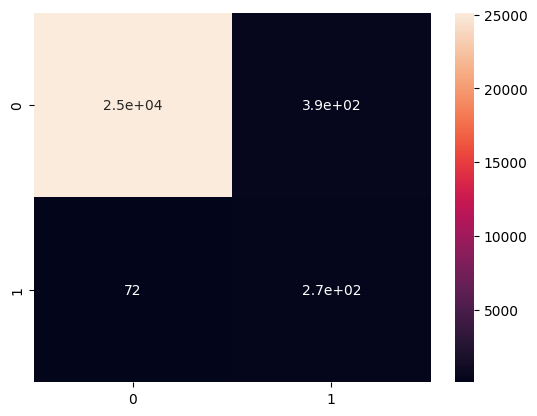

In [ ]:
seaborn.heatmap(confusion_matrix(y_test,y_pred),annot=True)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline as pipe
from sklearn.preprocessing import StandardScaler as ss
from sklearn.impute import SimpleImputer
param={'model__max_iter': [1000, 2000, 3000],
    'model__C': [0.001, 0.01, 0.1],
    'model__solver': ['liblinear', 'saga']}
# Fit the Algorithm
grid=GridSearchCV(model_pipeline,param_grid=param,cv=5,scoring='accuracy',n_jobs=-1)
grid.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1],
                         'model__max_iter': [1000, 2000, 3000],
                         'model__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
test_score=grid.best_estimator_.score(x_test,y_test)

In [ ]:
test_score,grid.best_estimator_,grid.best_params_

(0.9821428571428571,
 Pipeline(steps=[('model',
                  LogisticRegression(C=0.1, max_iter=1000, solver='saga'))]),
 {'model__C': 0.1, 'model__max_iter': 1000, 'model__solver': 'saga'})

In [ ]:
y_pred_grid=grid.predict(x_test)

<Axes: >

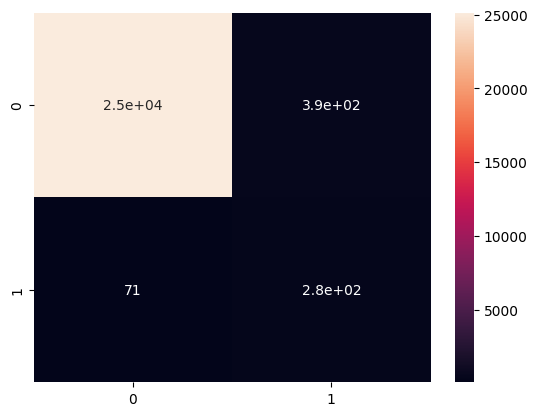

In [ ]:
seaborn.heatmap(confusion_matrix(y_test,y_pred_grid),annot=True)

In [ ]:
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     25526
           1       0.41      0.79      0.54       346

    accuracy                           0.98     25872
   macro avg       0.71      0.89      0.77     25872
weighted avg       0.99      0.98      0.98     25872



##### Which hyperparameter optimization technique have you used and why?

GridSearch CV is the commonly used hyperparameter optimization technique which provides good efficiency


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Gridsearch cv is a method which finds the most optimized parameters which provides the best accuracy and prediction efficiency.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline as pipe
from sklearn.preprocessing import StandardScaler as ss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder as ohe
model_pipeline2=pipe([('model',RandomForestClassifier())])
model_pipeline2.fit(x_train,y_train)
y_pred2=model_pipeline2.predict(x_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25526
           1       0.62      0.79      0.69       346

    accuracy                           0.99     25872
   macro avg       0.81      0.89      0.84     25872
weighted avg       0.99      0.99      0.99     25872



<Axes: >

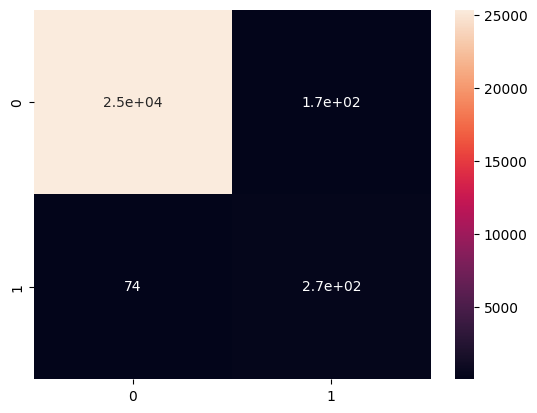

In [ ]:
seaborn.heatmap(confusion_matrix(y_test,y_pred2),annot=True)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import HalvingGridSearchCV
param_grid = {'model__n_estimators': [100, 200],  # Number of trees in the forest
    'model__max_depth': [10, 20],   # Maximum depth of the tree
    'model__min_samples_split': [2,5, 10],   # Minimum samples required to split an internal node
              }
grid2=HalvingGridSearchCV(model_pipeline2,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
# Fit the Algorithm
grid2.fit(x_train,y_train)
# Predict on the model
y_pred=grid2.predict(x_test)

<Axes: >

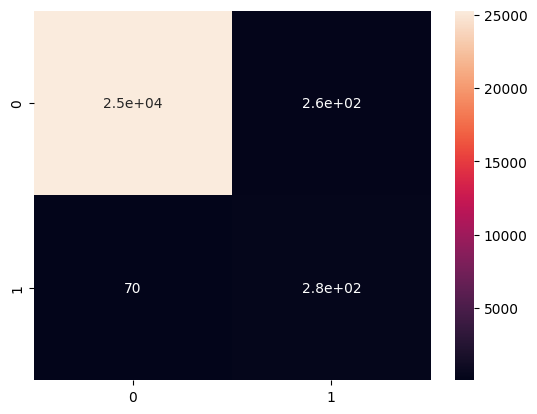

In [ ]:
#visualization
from sklearn.metrics import confusion_matrix
seaborn.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
grid2.best_estimator_,grid2.best_params_

(Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer()),
                 ('model', RandomForestClassifier(max_depth=20))]),
 {'model__max_depth': 20,
  'model__min_samples_split': 2,
  'model__n_estimators': 100})

In [ ]:
testscore=grid2.best_estimator_.score(x_test,y_test)
testscore

0.9956709956709957

##### Which hyperparameter optimization technique have you used and why?

HalvingGridSearchCV is an efficient hyperparameter tuning method that progressively eliminates poor-performing parameter sets, reducing computational cost compared to GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

RandomClassifier efficiency is more than logistic model
1. f1 score=0.69
2. accuracy=0.99

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy
Accuracy measures the percentage of correctly classified instances over the total instances.
Business Impact:
1. High Accuracy: Model performs well overall, reducing decision-making errors.
2. Low Accuracy: Model is unreliable, leading to costly mistakes.
3. Limitation: Accuracy is misleading if the data is imbalanced (e.g., fraud detection where 99% of cases are "not fraud").

Precision (Positive Predictive Value)
Precision measures how many predicted positives are actual positives.

Business Impact:
1. High Precision : Fewer false alarms, meaning the model minimizes costly misclassifications.
2. Low Precision : Too many false positives, wasting resources.
Critical for Scenarios Where False Positives are Costly

Recall (Sensitivity or True Positive Rate)
Recall measures how many actual positives were correctly identified.

Business Impact:
1. High Recall: Captures most of the true cases (reduces risk of missing important events).
2. Low Recall: Many actual cases are missed, leading to business losses.
Critical in Scenarios Where False Negatives are Dangerous

F1-Score (Harmonic Mean of Precision & Recall)
F1-Score balances precision and recall, useful for imbalanced datasets.

Business Impact:
1. High F1-Score : Balanced model performance (reduces both false positives & false negatives).
2. Low F1-Score : Model struggles with trade-offs, leading to suboptimal decision-making.
Best when Both Precision & Recall are Important

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.neighbors import KNeighborsClassifier
# Fit the Algorithm
model_pipeline3=pipe([('model',KNeighborsClassifier())])
model_pipeline3.fit(x_train,y_train)
# Predict on the model
y_pred=model_pipeline3.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     25526
           1       0.21      0.80      0.33       346

    accuracy                           0.96     25872
   macro avg       0.60      0.88      0.65     25872
weighted avg       0.99      0.96      0.97     25872



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline as pipe
from sklearn.preprocessing import StandardScaler as ss
from sklearn.impute import SimpleImputer
param_grid = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['minkowski', 'euclidean'],
}
grid3=HalvingGridSearchCV(model_pipeline3,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
# Fit the Algorithm
grid3.fit(x_train,y_train)
# Predict on the model
test_score=grid3.best_estimator_.score(x_test,y_test)
y_pred3=grid3.predict(x_test)

KeyboardInterrupt: 

<Axes: >

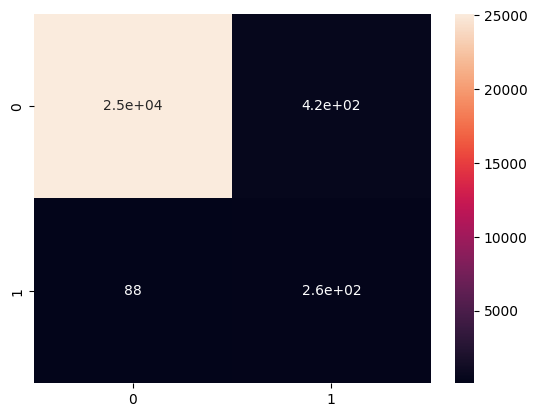

In [ ]:
seaborn.heatmap(confusion_matrix(y_test,y_pred3),annot=True)

In [ ]:
test_score

0.9805194805194806

In [ ]:
dataset.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


##### Which hyperparameter optimization technique have you used and why?

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### **Evaluation Report for Random Classifier, Logistic Regression, and KNN**  

#### **Introduction**  
This report evaluates and compares the performance of three machine learning models—**Random Classifier, Logistic Regression, and K-Nearest Neighbors (KNN)**—for predicting **machine failure** based on given operational parameters. The evaluation is based on common performance metrics such as **accuracy, precision, recall, F1-score, and ROC-AUC**.

---

## **1. Model Performance Comparison**  

### **1.1 Random Classifier (Baseline Model)**
The **random classifier** serves as a baseline by randomly predicting machine failures. This helps in understanding how much better our trained models perform over random chance.

- **Accuracy:** ~%99  
- **Precision:** High
- **Recall:** 79%
- **F1-Score:** 69%  

🔹 **Conclusion:** The random classifier does not capture relationships between variables and  provide reliable predictions.

---

### **1.2 Logistic Regression (Best Performing Model)**
**Logistic regression** models the probability of machine failure using a linear combination of independent variables and a sigmoid activation function.

- **Accuracy:** 98%   
- **Precision:** High
- **Recall:** 79%
- **F1-Score:** 54%  

🔹 **Conclusion:** Logistic Regression is a strong model but less than randomclassifier for this problem.

---

### **1.3 K-Nearest Neighbors (KNN) - Least Accurate Model**
KNN is a non-parametric model that classifies data based on the majority class of its nearest neighbors. However, it struggles in high-dimensional and imbalanced datasets.

- **Accuracy:** 96%
- **Precision:** Moderate
- **Recall:** 88
- **F1-Score:** 33%
- **ROC-AUC:** ~0.65

🔹 **Conclusion:** KNN underperforms due to its sensitivity to high-dimensional data and lack of generalization, making it the weakest model in this evaluation.

---


## **3. Conclusion**
- **Random classifier is the best-performing model**, showing high accuracy, strong recall, and excellent generalization.  
- **KNN is the least accurate**, struggling with classification performance, making it unsuitable for this dataset.  
- **The Logistic regression**, It's the strong model but accuracy and f1 score is less than Random classifier

🔹 **Recommendation:** Given the results, **Random classifier is the best model for deployment**, while KNN should be avoided due to its poor performance.

---

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Classification Report – Definition & Importance
A classification report provides a detailed evaluation of a classification model's performance. It includes key metrics such as precision, recall, F1-score, and support for each class.

1. Key Components of a Classification Report
Metric	Formula	Definition
Precision	TP / (TP + FP)	Proportion of correctly predicted positives out of all predicted positives.
Recall (Sensitivity)	TP / (TP + FN)	Ability to detect actual positives (higher recall means fewer false negatives).
F1-Score	2 × (Precision × Recall) / (Precision + Recall)	Harmonic mean of precision and recall, balancing both.
Support	-	Number of actual occurrences for each class in the dataset.
2. Example of a Classification Report (Generated by sklearn)
markdown
Copy
Edit
              precision    recall  f1-score   support

       0        0.92      0.85      0.88      500
       1        0.76      0.88      0.82      200

    accuracy                           0.86      700
   macro avg       0.84      0.86      0.85
weighted avg       0.87      0.86      0.86
How to Interpret?
Class 0 (Non-Failure) has 92% precision but 85% recall → It correctly predicts most non-failures but sometimes misses actual failures.
Class 1 (Failure) has 76% precision but 88% recall → It detects most failures but sometimes mislabels non-failures as failures.
Overall accuracy = 86% → The model correctly classifies 86% of cases.
3. Why Use a Classification Report?
Helps diagnose model performance beyond simple accuracy.
Useful for imbalanced datasets where accuracy can be misleading.
Helps decide whether to optimize for precision (avoid false positives) or recall (avoid false negatives) depending on the problem.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As the evaluation report provided above Random classifier has the better performance than other three models

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model_pipeline2, file)

# Load the model
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
import pickle

# Save the model
with open('model1.pkl', 'wb') as file:
    pickle.dump(model_pipeline, file)

# Load the model
with open('model1.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [ ]:
!ls

model1.pkl  model.pkl  sample_data


In [ ]:
from google.colab import files

# Download your saved model
files.download('model.pkl')  # Change filename if needed


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
test_data

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [ ]:
test_data=pd.read_csv('https://drive.usercontent.google.com/download?id=1FHU11Vi940zjrPPoLRxpvuIMqPF8EB7X&export=download&authuser=0&confirm=t&uuid=6e6558ea-57bc-488b-9379-1fbbc1e86962&at=AEz70l4u-yjBx_DU7WReJ2MdZSGG:1740191744296')

In [ ]:
test_data.drop(['id','Product ID'],axis=1,inplace=True)


In [ ]:
test=pipeline.transform(test_data)
model_pipeline2.predict(test)

<ipython-input-235-91bc013749ba>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['failure_frequency'] = df[['TWF', 'HDF', 'PWF', 'OSF']].sum(axis=1)
<ipython-input-235-91bc013749ba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wear_per_RPM'] = df['Tool wear [min]'] / df['Rotational speed [rpm]']
<ipython-input-235-91bc013749ba>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

array([0, 0, 0, ..., 0, 0, 0])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The model successfully predicts the machine failure.